# 피마인디안 당뇨병

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

diabetes_df = pd.read_csv('./data/diabetes.csv')
diabetes_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


1) 데이터 정보

In [100]:
# Nan값 없음
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2) 데이터 탐색

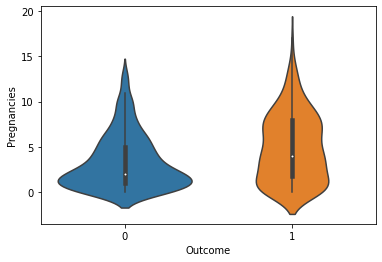

In [101]:
# 임신 횟수
sns.violinplot(x ='Outcome', y='Pregnancies', data = diabetes_df)
plt.show()

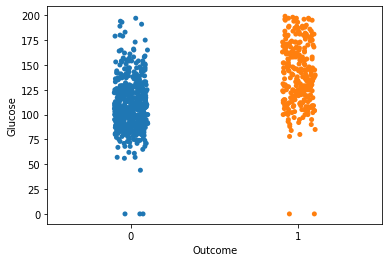

In [102]:
# 포도당 부하 검사 수치
sns.stripplot(x ='Outcome', y='Glucose', data = diabetes_df)
plt.show()

In [103]:
# 나이 카테고리화
bins = [1, 5, 12, 18, 25, 35, 60, 150]
labels = ['Baby','Child','Teenager','Student','Adult','Middle Age','Senior']

cats = pd.cut(diabetes_df.Age, bins, labels=labels)
diabetes_df['Age_cat'] = cats

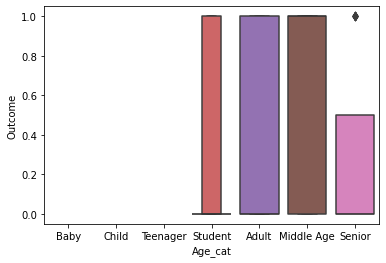

In [104]:
# 나이
sns.boxenplot(x ='Age_cat', y='Outcome' , data = diabetes_df)
plt.show()

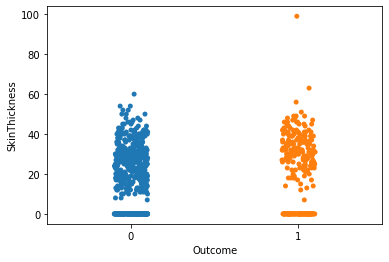

In [105]:
# 팔 삼두근 뒤쪽의 피하지방 측정 값
sns.stripplot(x ='Outcome', y='SkinThickness', data = diabetes_df)
plt.show()

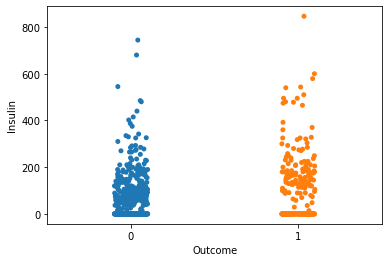

In [106]:
# 혈청 인슐린
sns.stripplot(x ='Outcome', y='Insulin', data = diabetes_df)
plt.show()

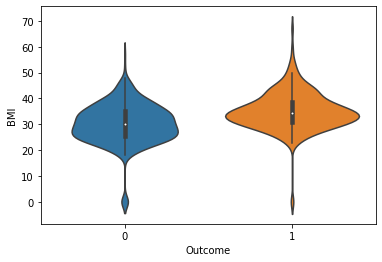

In [107]:
# BMI 지수
sns.violinplot(x ='Outcome', y='BMI', data = diabetes_df)
plt.show()

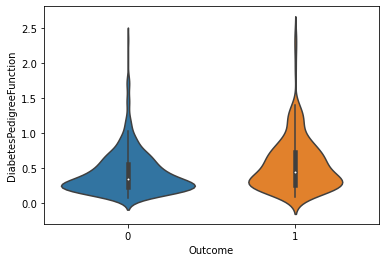

In [108]:
# 당뇨 내력 가중치 값
sns.violinplot(x ='Outcome', y='DiabetesPedigreeFunction', data = diabetes_df)
plt.show()

info()로 봤을 때 값이 전부 채워져 있어 NaN값이 없는 줄 알았는데 <br>
BMI, 인슐린, 피하지방, 포도당 수치가 0인 값들은 올바른 데이터가 아니다.

In [109]:
# 평균 대체
def imputation(df):

    # 포도당 부하 검사 수치
    df.Glucose.replace(0.0, df.Glucose.mean(), inplace=True)
    # 팔 삼두근 뒤쪽의 피하지방 측정 값
    df.SkinThickness.replace(0.0, df.SkinThickness.mean(), inplace=True)
    # 혈청 인슐린
    df.Insulin.replace(0.0, df.Insulin.mean(), inplace=True)
    # BMI 지수
    df.BMI.replace(0.0, df.BMI.mean(), inplace=True)
    return df

3) 생존자 예측

In [110]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
y_diabetes_df = diabetes_df['Outcome']
X_diabetes_df = diabetes_df.drop('Outcome', axis=1)
X_diabetes_df = imputation(X_diabetes_df)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes_df, y_diabetes_df, test_size=0.2, random_state=11
)

In [112]:
print(f'레이블 테스트 세트 크기: {y_test.shape}')
print(f'테스트 세트 레이블 0과 1의 분포도: {pd.Series(y_test).value_counts()}')

레이블 테스트 세트 크기: (154,)
테스트 세트 레이블 0과 1의 분포도: 0    100
1     54
Name: Outcome, dtype: int64


### 오차 행렬

In [113]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print(f'오차 행렬: \n {confusion}')
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},  F1 스코어: {f1:.4f}')


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 오차행렬
from sklearn.metrics import confusion_matrix
# Precision/Recall Trade-off
from sklearn.preprocessing import Binarizer
custom_threshold = 0.5

# DecisionTreeClassifier 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# Threshold 적용
pred_proba = dt_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

print('DecisionTreeClassifier')
get_clf_eval(y_test, custom_predict)

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
# Threshold 적용
pred_proba = rf_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

print('RandomForestClassifier')
get_clf_eval(y_test, custom_predict)

# LogisticRegression 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

print('LogisticRegression')
get_clf_eval(y_test, custom_predict)

# SupportVectorClassifier 학습/예측/평가
# SupportVectorClassifier는 
sv_clf = SVC(random_state=11)
sv_clf.fit(X_train, y_train)
sv_pred = sv_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

print('SupportVectorClassifier')
get_clf_eval(y_test, custom_predict)


DecisionTreeClassifier
오차 행렬: 
 [[79 21]
 [23 31]]
정확도: 0.7143, 정밀도: 0.5962, 재현율: 0.5741,  F1 스코어: 0.5849
RandomForestClassifier
오차 행렬: 
 [[88 12]
 [26 28]]
정확도: 0.7532, 정밀도: 0.7000, 재현율: 0.5185,  F1 스코어: 0.5957
LogisticRegression
오차 행렬: 
 [[89 11]
 [25 29]]
정확도: 0.7662, 정밀도: 0.7250, 재현율: 0.5370,  F1 스코어: 0.6170
SupportVectorClassifier
오차 행렬: 
 [[89 11]
 [25 29]]
정확도: 0.7662, 정밀도: 0.7250, 재현율: 0.5370,  F1 스코어: 0.6170


In [115]:
# Stratified K-Fold 방식으로 교차 검증
from sklearn.model_selection import StratifiedKFold

def exec_skfold(clf, folds=5):
    skfold = StratifiedKFold(n_splits = folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(skfold.split(X_titanic_df, y_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 인덱스 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}' )

    mean_score = np.mean(scores)
    print(f"평균 정확도: {mean_score:.4f}")

In [116]:
# DecisionTreeClassifier 교차검증
exec_skfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.6623
교차 검증 1 정확도 : 0.6753
교차 검증 2 정확도 : 0.7273
교차 검증 3 정확도 : 0.7647
교차 검증 4 정확도 : 0.7516
평균 정확도: 0.7163


In [117]:
# RandomForestClassifier 교차검증
exec_skfold(rf_clf, folds=5)

교차 검증 0 정확도 : 0.7597
교차 검증 1 정확도 : 0.7208
교차 검증 2 정확도 : 0.7792
교차 검증 3 정확도 : 0.8235
교차 검증 4 정확도 : 0.7712
평균 정확도: 0.7709


In [118]:
# LogisticRegression 교차검증
exec_skfold(lr_clf, folds=5)

교차 검증 0 정확도 : 0.7727
교차 검증 1 정확도 : 0.7468
교차 검증 2 정확도 : 0.7597
교차 검증 3 정확도 : 0.8170
교차 검증 4 정확도 : 0.7516
평균 정확도: 0.7696


In [119]:
# SupportVectorClassifier 교차검증
exec_skfold(sv_clf, folds=5)

교차 검증 0 정확도 : 0.7468
교차 검증 1 정확도 : 0.7338
교차 검증 2 정확도 : 0.7727
교차 검증 3 정확도 : 0.7908
교차 검증 4 정확도 : 0.7516
평균 정확도: 0.7591


### 결정 트리 모델을 cross_val_score 함수를 이용하여 교차 검증

In [120]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_diabetes_df, y_diabetes_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f"평균 정확도: {np.mean(scores):.4f}")

교차 검증 0 정확도 : 0.6883
교차 검증 1 정확도 : 0.6753
교차 검증 2 정확도 : 0.6688
교차 검증 3 정확도 : 0.7451
교차 검증 4 정확도 : 0.7516
평균 정확도: 0.7058



GridSearchCV를 통하여 결정트리 모델의 최적 파라미터 도출

In [121]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':[2,3,5,10],
    'min_samples_leaf':[1,5,8],
    'min_samples_split':[2,3,5] 
}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_:.4f}')
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'테스트 세트에서의 DecisionTreeClassifier 정확도: {accuracy:.4f}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7606
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.6818
